In [25]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/mall_customers_clustering.csv', index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


<Axes: xlabel='Income', ylabel='Score'>

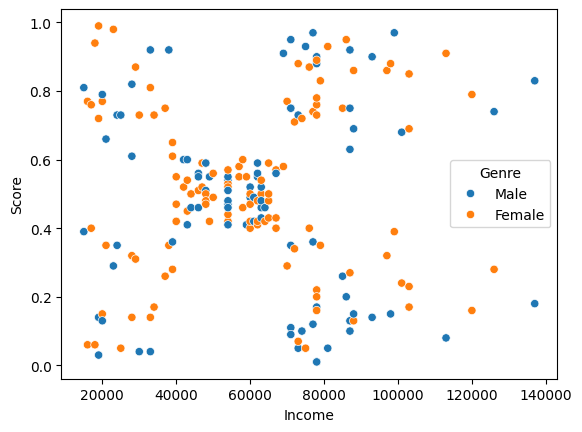

In [26]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

In [27]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)

In [28]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42).fit(X)

In [29]:
y_kmeans = k_means.labels_

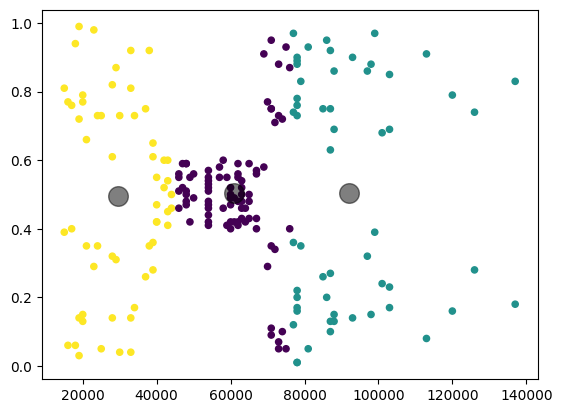

In [30]:
from matplotlib import pyplot as plt

plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

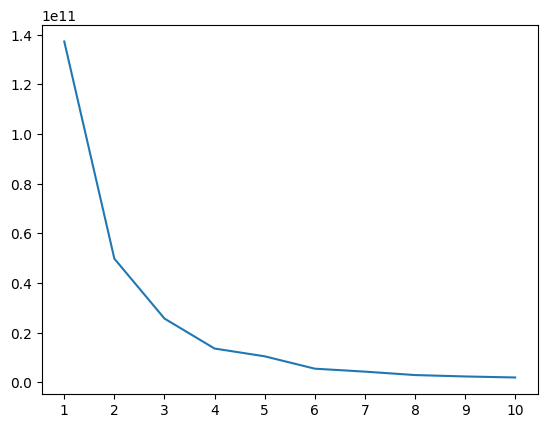

In [31]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

In [32]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X)

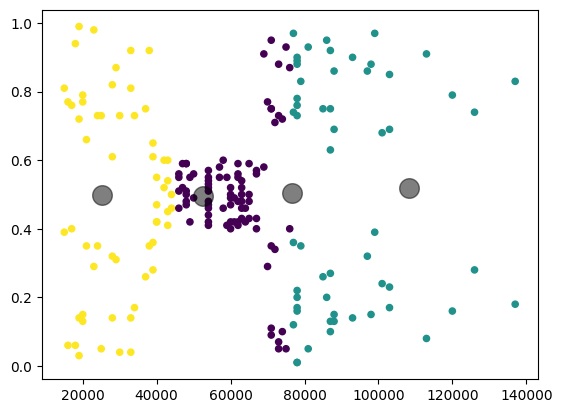

In [33]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

In [34]:
k_means = KMeans(n_clusters=8, random_state=42).fit(X)

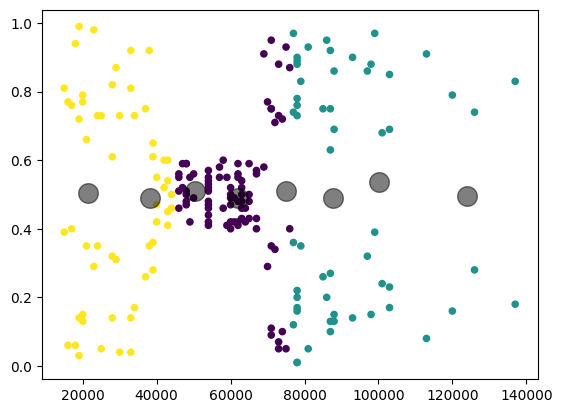

In [35]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


<Axes: xlabel='Income', ylabel='Score'>

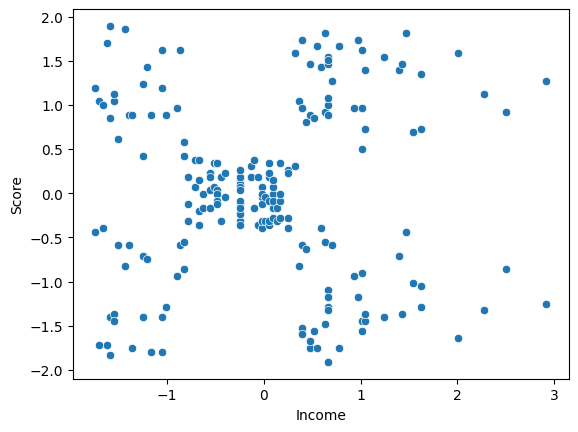

In [47]:
sns.scatterplot(x='Income' , y='Score', data=X_scaled)

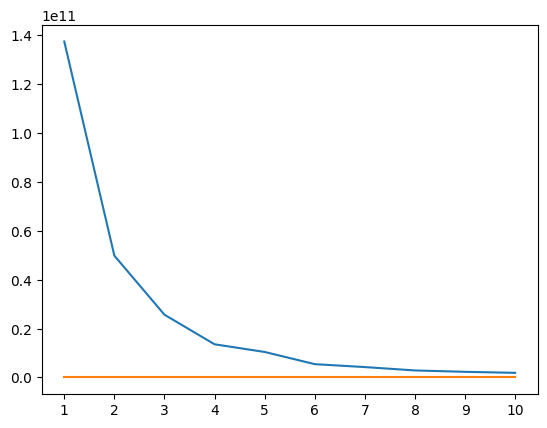

In [48]:
unscaled, scaled = [], []
for i in range(1,11):
	unscaled.append(KMeans(n_clusters=i,random_state=42).fit(X).inertia_)
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),unscaled)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

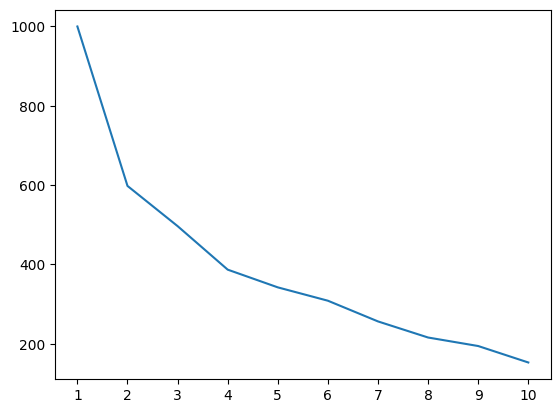

In [49]:
scaled = []
for i in range(1,11):
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

In [50]:

k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

In [51]:

y_kmeans = k_means.labels_

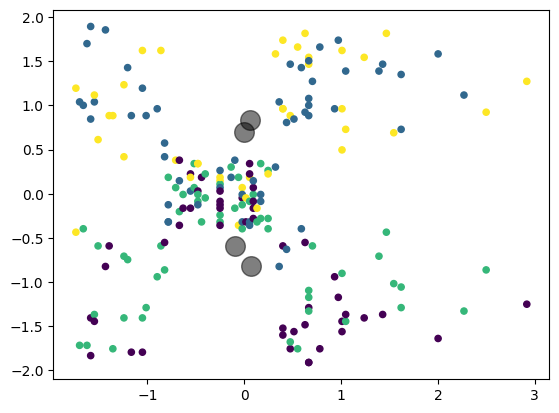

In [52]:
plt.scatter(X_scaled.Income, X_scaled.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

In [53]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


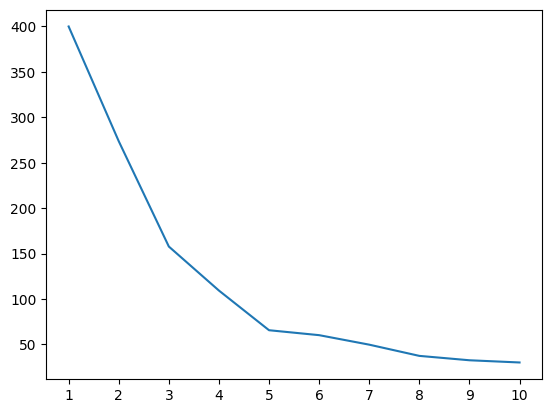

In [54]:
flat = []
for i in range(1,11):
	flat.append(KMeans(n_clusters=i,random_state=42).fit(X_flat).inertia_)
plt.plot(range(1,11),flat)
plt.xticks(range(1,11))
_ = plt.show()

In [55]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)

In [56]:
y_kmeans = k_means.labels_

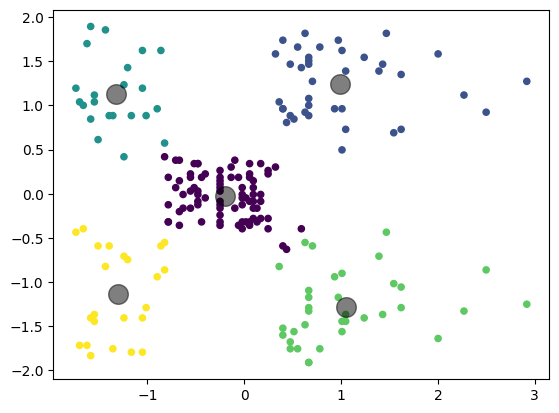

In [57]:
plt.scatter(X_flat.Income, X_flat.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [58]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [59]:
from scipy.cluster.hierarchy import dendrogram

In [60]:
import numpy as np


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

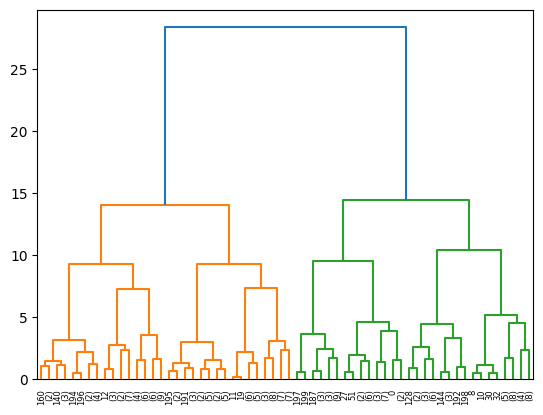

In [61]:
plot_dendrogram(model, truncate_mode="level", p=5)

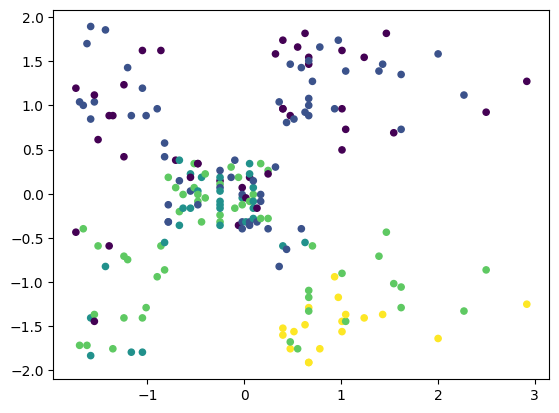

In [62]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

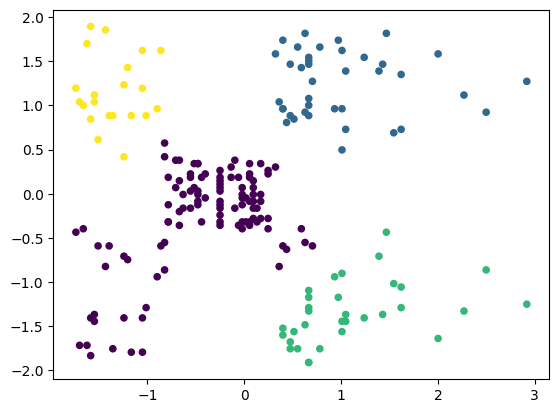

In [63]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

In [64]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [65]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

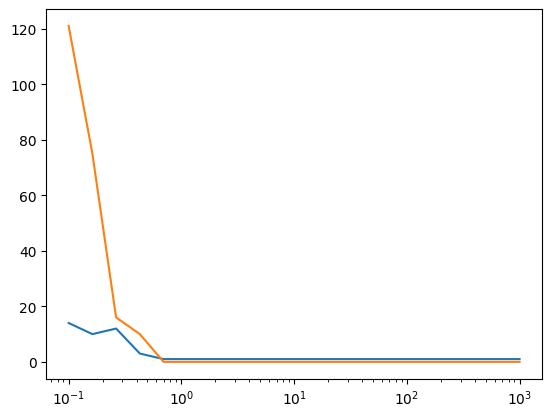

In [66]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

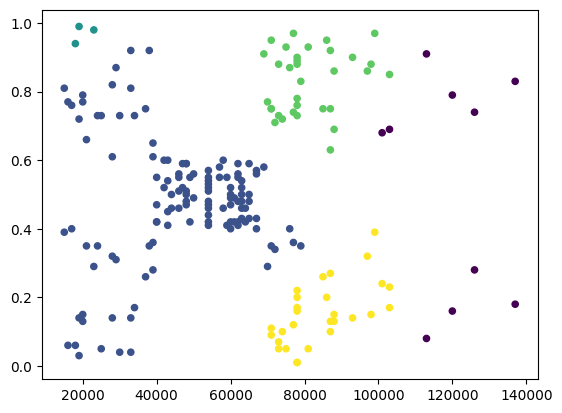

In [67]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

In [ ]:
# Сводка по лабе

# Лабораторная работа направлена на кластеризацию — это процесс группировки объектов в зависимости от их схожести. В этой работе мы разбиваем клиентов магазина на группы, где каждый клиент в группе будет похож на других. Например, одни клиенты могут тратить больше денег, а другие — меньше.
# 
# Мы изучаем три метода кластеризации:
# 
# KMeans — это метод, который заранее просит указать количество групп (кластеров), и старается так распределить объекты, чтобы каждый кластер был как можно более однородным.
# 
# DBSCAN — метод, который сам находит количество групп, основываясь на том, насколько близки объекты друг к другу. Этот метод также может находить "шум", то есть объекты, которые не подходят ни к одной группе.
# 
# Иерархическая кластеризация — строит дерево, показывающее, как объекты могут быть объединены в группы на разных уровнях. Это помогает выбрать наилучшее количество групп.
# 
# Цель работы — понять, как эти методы работают на примере данных о клиентах, и научиться правильно настраивать параметры, чтобы группы получались максимально полезными

In [ ]:
# 1. Для придания смысла кластерам выведите примеры точек выборки для каждого кластера. Сделайте вывод, чем они отличаются.

In [68]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [69]:
clusters = k_means.fit_predict(X_flat)

cluster_df = pd.DataFrame(clusters, columns=['Cluster'])

In [70]:
cluster_df.head()

,Cluster
0,4
1,2
2,4
3,2
4,4


In [71]:
for cluster in cluster_df['Cluster'].unique():
    print(f'Cluster {cluster} examples:')
    print(cluster_df[cluster_df['Cluster'] == cluster].head(3))

Cluster 4 examples:
   Cluster
0        4
2        4
4        4
Cluster 2 examples:
   Cluster
1        2
3        2
5        2
Cluster 0 examples:
    Cluster
43        0
46        0
47        0
Cluster 1 examples:
     Cluster
123        1
125        1
127        1
Cluster 3 examples:
     Cluster
124        3
128        3
130        3


In [ ]:
#  2. Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков.

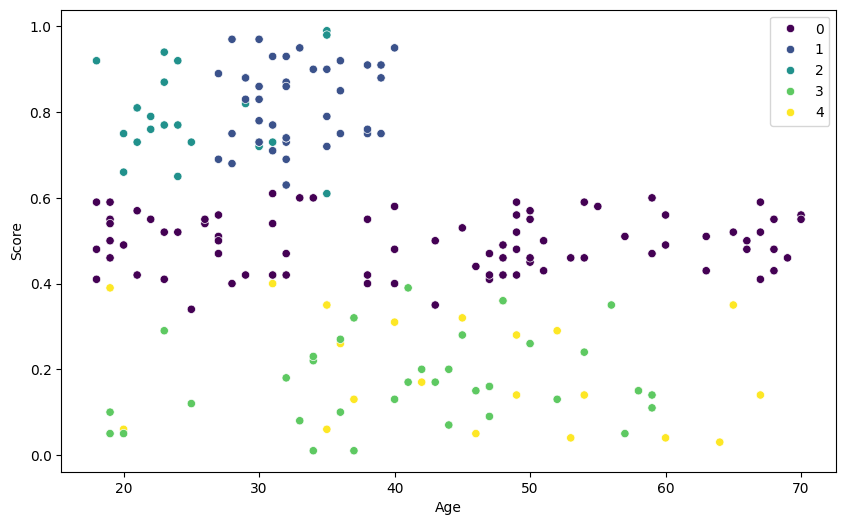

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Score'], hue=cluster_df['Cluster'], palette='viridis')
plt.legend()
plt.show()

In [ ]:
#  Повторите весь анализ для другого датасета - кластеризации кредитных карт.

In [73]:
credit_card_df = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/credit_card_clustering.csv")

In [74]:
credit_card_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [75]:
credit_card_df.drop(['CUST_ID', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT'], axis=1, inplace=True)

In [76]:
credit_card_df = pd.get_dummies(credit_card_df, drop_first=True)

In [77]:
scaler = StandardScaler().fit(credit_card_df)
credit_card_scaled = scaler.transform(credit_card_df)
credit_card_scaled = pd.DataFrame(credit_card_scaled, columns=credit_card_df.columns)

In [78]:
credit_card_flat = credit_card_scaled[['BALANCE', 'PURCHASES_FREQUENCY']]

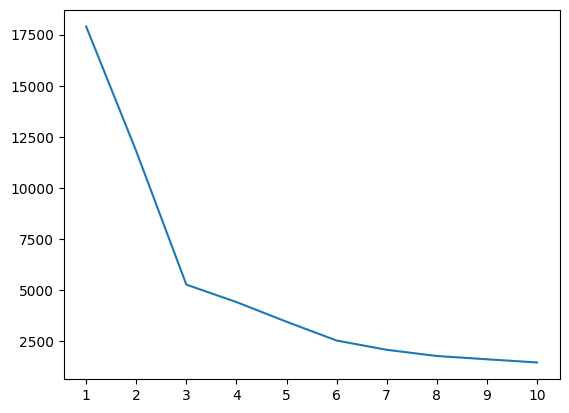

In [79]:
flat = []
for i in range(1,11):
	flat.append(KMeans(n_clusters=i,random_state=42).fit(credit_card_flat).inertia_)
plt.plot(range(1,11),flat)
plt.xticks(range(1,11))
_ = plt.show()

In [80]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(credit_card_flat)
y_kmeans = kmeans.labels_

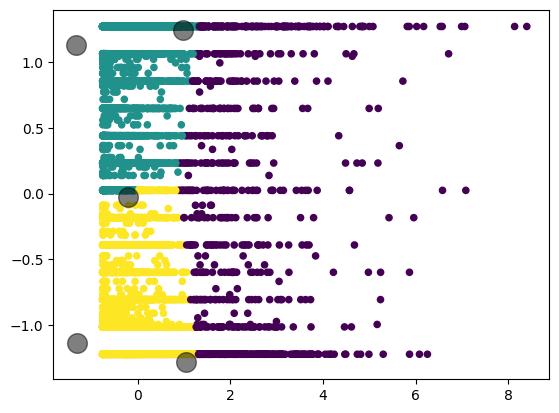

In [81]:
plt.scatter(credit_card_flat.BALANCE, credit_card_flat.PURCHASES_FREQUENCY, c=y_kmeans, cmap='viridis', s=20)
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [82]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(credit_card_flat)
credit_card_df['Agg_Cluster'] = agg_clustering.labels_

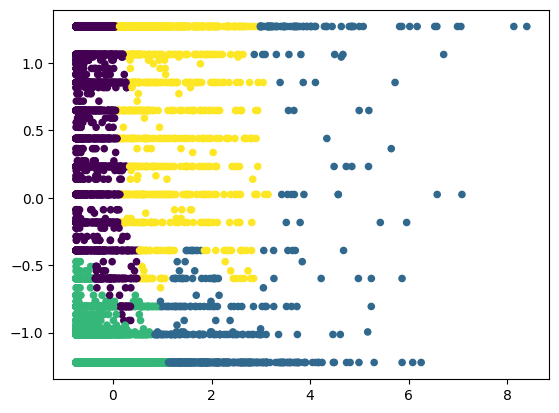

In [83]:
plt.scatter(credit_card_flat.BALANCE, credit_card_flat.PURCHASES_FREQUENCY, c=agg_clustering.labels_, cmap='viridis', s=20)
plt.show()

In [84]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(credit_card_scaled)

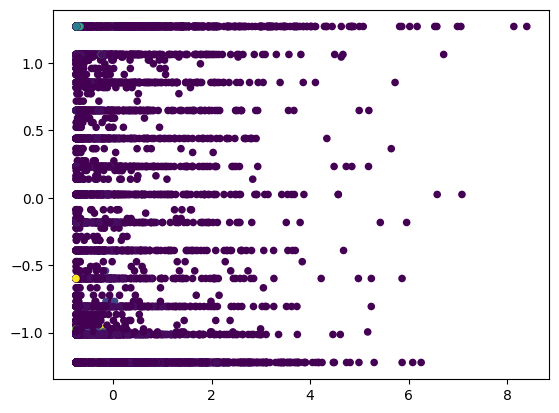

In [85]:
plt.scatter(credit_card_flat.BALANCE, credit_card_flat.PURCHASES_FREQUENCY, c=dbscan.labels_, cmap='viridis', s=20)
plt.show()